# Import packages and loading the data

In [510]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import log_loss

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

# Classification data
------------------------

# 1.Real world dataset

In [471]:
np.random.seed(16)

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [472]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [473]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [474]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [475]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outlier

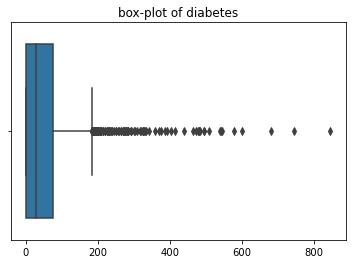

In [476]:
sns.boxplot(df)
plt.title('box-plot of diabetes')
plt.savefig('box')

In [477]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [478]:
threshold = 3

In [479]:
df_o = df[(z < 3).all(axis = 1)]
print(df.shape)
print(df_o.shape)

(768, 9)
(719, 9)


## Building the neural network

In [480]:
def linear(x):
    return x

def sigmoid( x):
    return 1/(1 + np.exp(-x))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X, y,):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(8, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = sigmoid(Z2)

            loss = log_loss(y, y_pred)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X):
        y_pred = (self.predict_proba(X) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = sigmoid(Z2)

        return A2
    
network = NeuralNetwork(0.01, 100, 685)
loss_list = network.fit(X, y)

In [481]:
test_preds = network.predict(X)
print(classification_report(y, test_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.35      1.00      0.52       268

    accuracy                           0.35       768
   macro avg       0.17      0.50      0.26       768
weighted avg       0.12      0.35      0.18       768



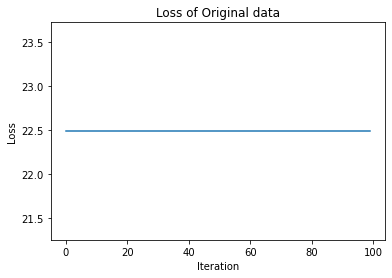

In [482]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss of Original data')
plt.savefig('original')

## 1.1 Scaling -  MinMax scaler

In [483]:
X_o = df_o.iloc[:,:-1].to_numpy()
y_o = df_o.iloc[:, -1].to_numpy()

In [484]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()

In [485]:
X_1= scaler_1.fit_transform(X_o)
X_1

array([[0.46153846, 0.67096774, 0.48571429, ..., 0.44380403, 0.39696312,
        0.61702128],
       [0.07692308, 0.26451613, 0.4       , ..., 0.24207493, 0.19739696,
        0.21276596],
       [0.61538462, 0.89677419, 0.37142857, ..., 0.14697406, 0.42950108,
        0.23404255],
       ...,
       [0.38461538, 0.49677419, 0.48571429, ..., 0.23054755, 0.12075199,
        0.19148936],
       [0.07692308, 0.52903226, 0.31428571, ..., 0.34293948, 0.19595083,
        0.55319149],
       [0.07692308, 0.31612903, 0.45714286, ..., 0.35158501, 0.17136659,
        0.04255319]])

## Building the neural network

In [487]:
def linear(X):
    return X

def sigmoid(X):
    return 1/(1 + np.exp(-X))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_1, y_o):
        y_o = y_o.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(8, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_1, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_o_pred = sigmoid(Z2)

            loss = log_loss(y_o, y_o_pred)
            loss_history.append(loss)   

            e = (y_o_pred - y_o)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_1.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_1):
        y_o_pred = (self.predict_proba(X_1) > 0.5).astype(int)
        return y_o_pred
    
    def predict_proba(self, X_1):
        Z1 = np.dot(X_1, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = sigmoid(Z2)

        return A2

network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_1, y_o)

In [489]:
test_preds = network.predict(X_1)
print(classification_report(y_o, test_preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       477
           1       0.72      0.55      0.62       242

    accuracy                           0.78       719
   macro avg       0.76      0.72      0.73       719
weighted avg       0.77      0.78      0.77       719



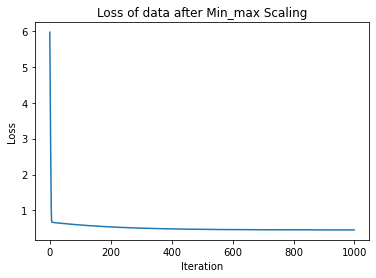

In [490]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss of data after Min_max Scaling')
plt.savefig('min-max_1')

## 1.2 Standardization

In [491]:
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
scaler_2 = StandardScaler()

In [492]:
scaled_2 = scaler_2.fit_transform(X)
X_2 = scaled_2
X_2

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [493]:
np.mean(X_2),np.std(X_2)

(1.8518173106052416e-16, 1.0)

## Building the neural network

In [494]:
def linear(X):
    return X

def sigmoid(X):
    return 1/(1 + np.exp(-X))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_2, y):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(8, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_2, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = sigmoid(Z2)

            loss = log_loss(y, y_pred)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_2.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_2):
        y_pred = (self.predict_proba(X_2) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, X_2):
        Z1 = np.dot(X_2, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = sigmoid(Z2)

        return A2
    
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_2, y)

In [495]:
test_preds = network.predict(X_2)
print(classification_report(y, test_preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.73      0.58      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



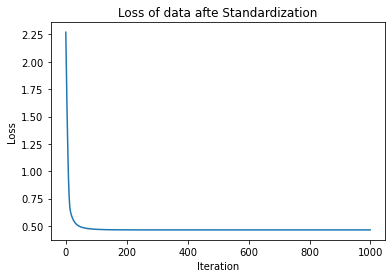

In [496]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss of data afte Standardization')
plt.savefig('standard_1')

## 1.3 Decorrelation

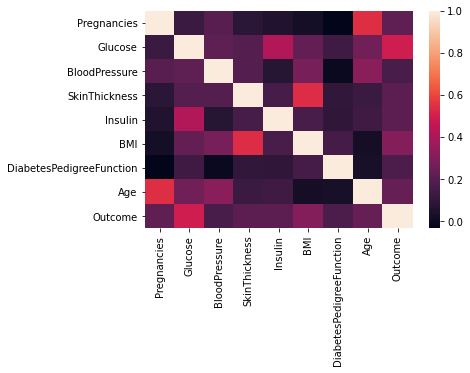

In [497]:
cmap = df.corr()
sns.heatmap(cmap)
plt.savefig('corr_1')

In [498]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
log_X_3 = transformer.transform(X_1)
log_X_3

array([[0.37948962, 0.51340294, 0.39589566, ..., 0.36728132, 0.33430068,
        0.48058574],
       [0.07410797, 0.23468954, 0.33647224, ..., 0.21678331, 0.18015   ,
        0.19290367],
       [0.47957308, 0.64015465, 0.31585295, ..., 0.13712723, 0.35732549,
        0.21029541],
       ...,
       [0.3254224 , 0.40331225, 0.39589566, ..., 0.20745923, 0.11399988,
        0.17520409],
       [0.07410797, 0.42463502, 0.27329333, ..., 0.29486085, 0.17894154,
        0.44031184],
       [0.07410797, 0.27469488, 0.37647757, ..., 0.30127799, 0.1581711 ,
        0.0416727 ]])

In [499]:
from sklearn.decomposition import PCA
model = PCA()

X_3 = model.fit_transform(log_X_3)
X_3

array([[ 0.323049  ,  0.0704467 ,  0.07627148, ...,  0.071198  ,
        -0.08093312, -0.01580399],
       [-0.17605508, -0.07070114, -0.00603889, ...,  0.13398397,
         0.07516316, -0.03679618],
       [ 0.17617171, -0.07293251,  0.17469042, ..., -0.02355183,
        -0.12039065, -0.14857484],
       ...,
       [-0.01144057, -0.18798122, -0.03385736, ..., -0.07199899,
        -0.03060818, -0.03259811],
       [ 0.02184686, -0.00485302, -0.01048819, ...,  0.20080056,
        -0.07893678,  0.05095479],
       [-0.24290969,  0.01625297, -0.07940953, ...,  0.0466495 ,
         0.07813308, -0.04127255]])

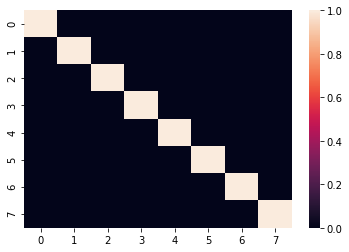

In [500]:
d = pd.DataFrame(X_3)
cmap = d.corr()
sns.heatmap(cmap)
plt.savefig('corr_11')

## Building the neural network

In [501]:
def linear(X):
    return X

def sigmoid(X):
    return 1/(1 + np.exp(-X))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_3, y_o):
        y_o = y_o.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(8, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_3, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_o_pred = sigmoid(Z2)

            loss = log_loss(y_o, y_o_pred)
            loss_history.append(loss)   

            e = (y_o_pred - y_o)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_3.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_3):
        y_o_pred = (self.predict_proba(X_3) > 0.5).astype(int)
        return y_o_pred
    
    def predict_proba(self, X_3):
        Z1 = np.dot(X_3, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = sigmoid(Z2)

        return A2
    
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_3, y_o)

In [502]:
test_preds = network.predict(X_3)
print(classification_report(y_o, test_preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       477
           1       0.69      0.54      0.60       242

    accuracy                           0.76       719
   macro avg       0.74      0.71      0.72       719
weighted avg       0.76      0.76      0.76       719



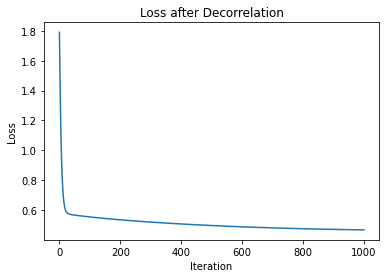

In [503]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss after Decorrelation')
plt.savefig('decor')

## 1.4 Log-transformation

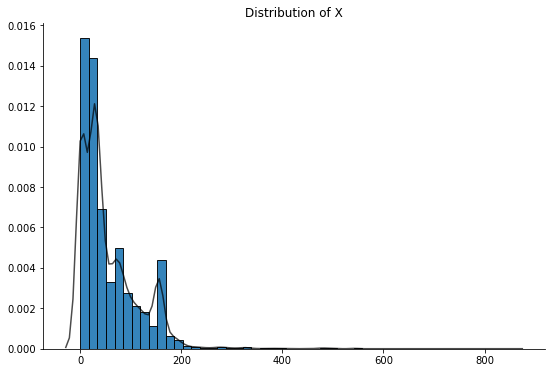

In [504]:
from statlearning import plot_dist
plot_dist(X)
plt.title('Distribution of X')
plt.savefig('without log')

In [505]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X_4 = transformer.transform(X)
X_4

array([[1.94591015, 5.00394631, 4.29045944, ..., 3.54385368, 0.48673783,
        3.93182563],
       [0.69314718, 4.4543473 , 4.20469262, ..., 3.31781577, 0.30084506,
        3.4657359 ],
       [2.19722458, 5.21493576, 4.17438727, ..., 3.19047635, 0.51402051,
        3.49650756],
       ...,
       [1.79175947, 4.80402104, 4.29045944, ..., 3.30321697, 0.21913553,
        3.4339872 ],
       [0.69314718, 4.84418709, 4.11087386, ..., 3.43720782, 0.29936358,
        3.87120101],
       [0.69314718, 4.54329478, 4.26267988, ..., 3.44680789, 0.27383667,
        3.17805383]])

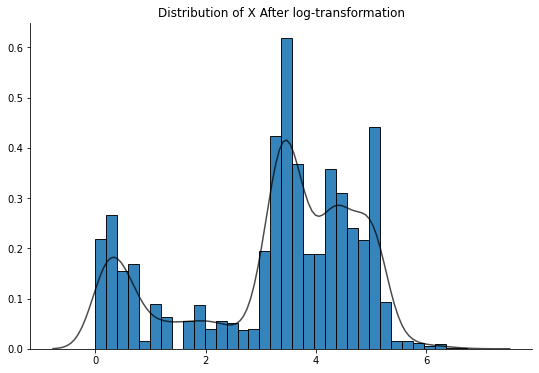

In [506]:
#log-transformation on y
plot_dist(X_4)
plt.title('Distribution of X After log-transformation')
plt.savefig('with log')

## Building the neural network

In [507]:
def linear(X):
    return X

def sigmoid(X):
    return 1/(1 + np.exp(-X))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_4, y):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(8, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_4, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = sigmoid(Z2)

            loss = log_loss(y, y_pred)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_4.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_4):
        y_pred = (self.predict_proba(X_4) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, X_4):
        Z1 = np.dot(X_4, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = sigmoid(Z2)

        return A2
    
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_4, y)

In [508]:
test_preds = network.predict(X_4)
print(classification_report(y, test_preds))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       500
           1       0.58      0.60      0.59       268

    accuracy                           0.71       768
   macro avg       0.68      0.69      0.68       768
weighted avg       0.71      0.71      0.71       768



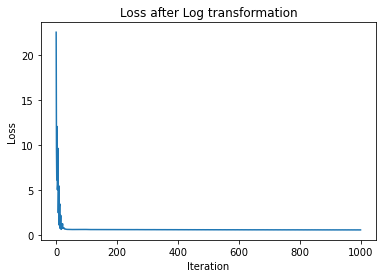

In [509]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss after Log transformation')
plt.savefig('log')

# 2. Synthetic database

In [423]:
X = np.array([[5.5029384,0.67,1.34],
             [9.7,224.35,1.01],
             [1.33,0.058,1.24],
             [1.11,13.4,1.338490],
             [0.09,7.4857,1.31],
             [1.44,1.76,49000.3]])
y = np.array([[0], [0], [1], [0], [0], [1]])
np.random.seed(0)

## Buliding the neural network

[[0.00504132]
 [0.00457304]
 [0.98919502]
 [0.00455511]
 [0.00460163]
 [0.99781878]]


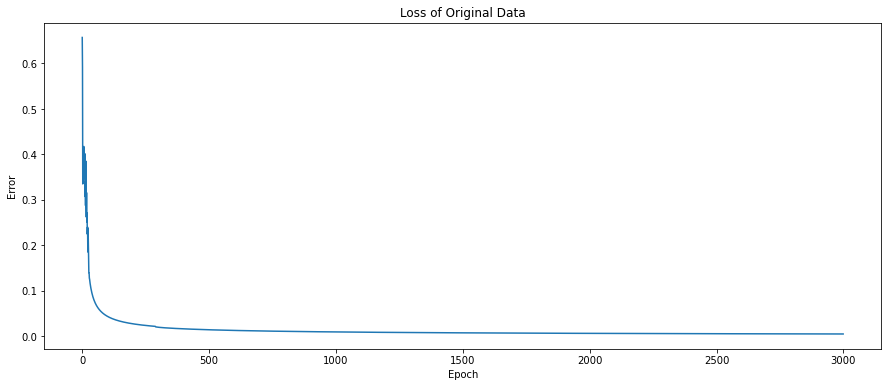

In [397]:
def sigmoid(X):
    return 1.0/(1+ np.exp(-X))

def sigmoid_derivative(X):
    return X * (1.0 - X)

class NeuralNetwork:
    def __init__(self, X_11, y):
        self.input = X_11
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = np.random.rand(self.input.shape[1],6) 
        self.weights2 = np.random.rand(6,1)   
        
        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
        for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(X,y)
nn.train()
print(nn.output)
    
#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Loss of Original Data')
plt.savefig('s_original')

## 2.1 Scaling -  MinMax scaler 

In [446]:
from sklearn.preprocessing import MinMaxScaler

scaler_11 = MinMaxScaler()

X_11 = scaler_11.fit_transform(X)
X_11

array([[5.63261020e-01, 2.72858595e-03, 6.73479146e-06],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.29032258e-01, 0.00000000e+00, 4.69394557e-06],
       [1.06139438e-01, 5.94849571e-02, 6.70397469e-06],
       [0.00000000e+00, 3.31162057e-02, 6.12253769e-06],
       [1.40478668e-01, 7.58832237e-03, 1.00000000e+00]])

## Building the neural network

[[0.00810782]
 [0.00320047]
 [0.98976176]
 [0.00319992]
 [0.00345111]
 [0.99861226]]


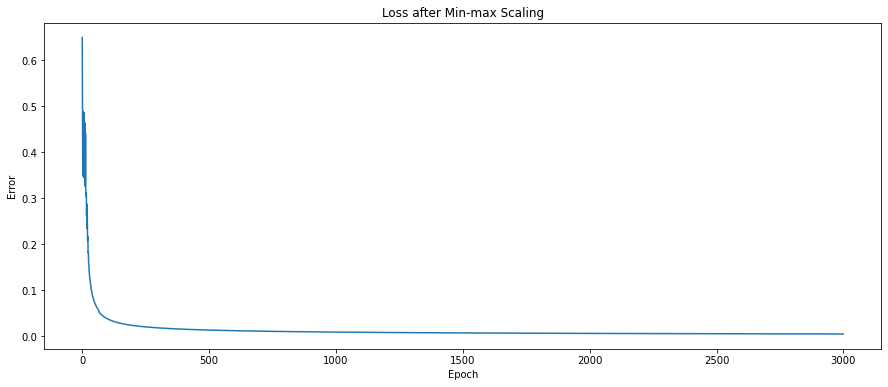

In [447]:
def sigmoid(X):
    return 1.0/(1+ np.exp(-X))

def sigmoid_derivative(X):
    return X * (1.0 - X)

class NeuralNetwork:
    def __init__(self, X_11, y):
        self.input = X_11
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = np.random.rand(self.input.shape[1],6) 
        self.weights2 = np.random.rand(6,1)   
        
        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
          for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(X,y)
nn.train()
print(nn.output)

#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.title('Loss after Min-max Scaling')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.savefig('min_max_2')

## 2.2 Standardization

In [448]:
from sklearn.preprocessing import StandardScaler

scaler_22 = StandardScaler()

X_22 = scaler_22.fit_transform(X)

X_22

array([[ 0.68446835, -0.49533131, -0.44720854],
       [ 1.92946064,  2.23246581, -0.44722661],
       [-0.55336818, -0.50279471, -0.44721402],
       [-0.61862772, -0.34008785, -0.44720862],
       [-0.92119467, -0.41221326, -0.44721018],
       [-0.52073841, -0.48203867,  2.23606798]])

## Building the neural network

[[0.00675954]
 [0.00277673]
 [0.99159072]
 [0.00277806]
 [0.00297203]
 [0.99944765]]


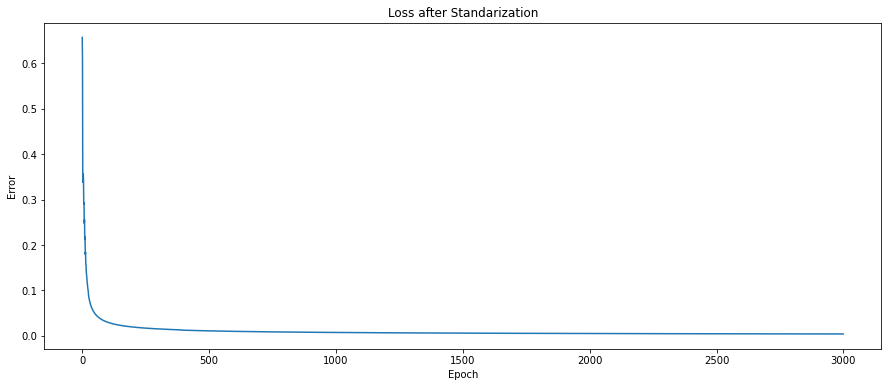

In [449]:
def sigmoid(X):
    return 1.0/(1+ np.exp(-X))

def sigmoid_derivative(X):
    return X * (1.0 - X)

class NeuralNetwork:
    def __init__(self, X_22, y):
        self.input = X_22
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = np.random.rand(self.input.shape[1],6) 
        self.weights2 = np.random.rand(6,1)   
        
        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
        for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(X,y)
nn.train()
print(nn.output)  

#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Loss after Standarization')
plt.savefig('scale_2')

## 2.3 Decorrelation

In [450]:
from sklearn.decomposition import PCA

pca = PCA()

X_33 = pca.fit_transform(X)
X_33

array([[-8.16637336e+03, -4.84270024e+01,  3.62399636e+00],
       [-8.16692008e+03,  1.75264593e+02,  1.25733675e-01],
       [-8.16647259e+03, -4.91822532e+01, -5.25426353e-01],
       [-8.16638700e+03, -3.58556232e+01, -1.20415544e+00],
       [-8.16640972e+03, -4.18015292e+01, -2.02014675e+00],
       [ 4.08325628e+04,  1.81495810e-03, -1.49574224e-06]])

## Building the neural network

[[0.00676994]
 [0.00279138]
 [0.99100275]
 [0.00279137]
 [0.00294178]
 [0.99824701]]


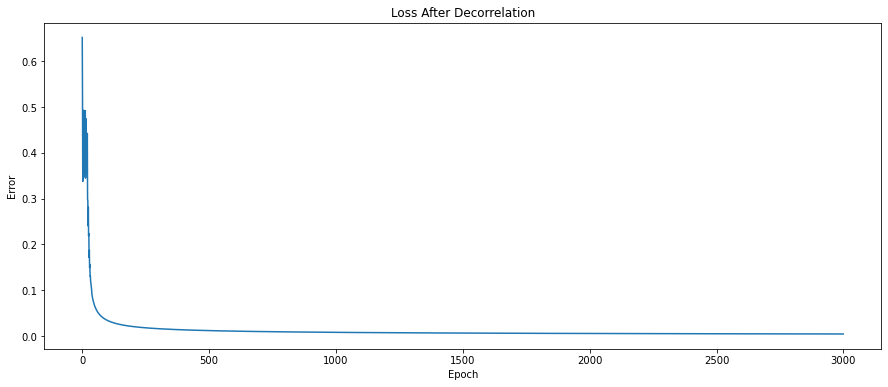

In [451]:
def sigmoid(X):
    return 1.0/(1+ np.exp(-X))

def sigmoid_derivative(X):
    return X * (1.0 - X)

class NeuralNetwork:
    def __init__(self, X_33, y):
        self.input = X_33
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = np.random.rand(self.input.shape[1],6) 
        self.weights2 = np.random.rand(6,1)   
        
        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
        for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(X,y)
nn.train()
print(nn.output)

#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Loss After Decorrelation')
plt.savefig('pca')

## 2.4 Log transformation

In [452]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X_44 = transformer.transform(X)
X_44

array([[ 1.87225414,  0.51282363,  0.85015093],
       [ 2.37024374,  5.41765475,  0.69813472],
       [ 0.84586827,  0.05638033,  0.80647587],
       [ 0.74668795,  2.66722821,  0.84950542],
       [ 0.0861777 ,  2.13838239,  0.83724752],
       [ 0.89199804,  1.01523068, 10.79960211]])

[[0.0077007 ]
 [0.00107756]
 [0.99230134]
 [0.00108591]
 [0.00137122]
 [0.999577  ]]


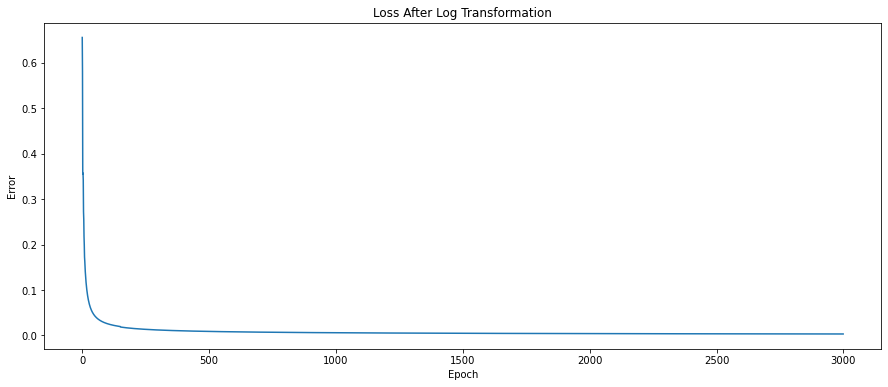

In [453]:
def sigmoid(X):
    return 1.0/(1+ np.exp(-X))

def sigmoid_derivative(X):
    return X * (1.0 - X)

class NeuralNetwork:
    def __init__(self, X_44, y):
        self.input = X_44
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = np.random.rand(self.input.shape[1],6) 
        self.weights2 = np.random.rand(6,1)   
        
        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
        for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(X,y)
nn.train()
print(nn.output)

#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Loss After Log Transformation')
plt.savefig('log_2')